# Data Exploration

* To get an insight, I will explore the data set before making a model.

In [1]:
import numpy as np
import pandas as pd

admission = pd.read_csv("Admission_Predict.csv")

In [2]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [4]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

We can see the distribution of each variable through histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0AE5CAF98>,
      dtype=object)

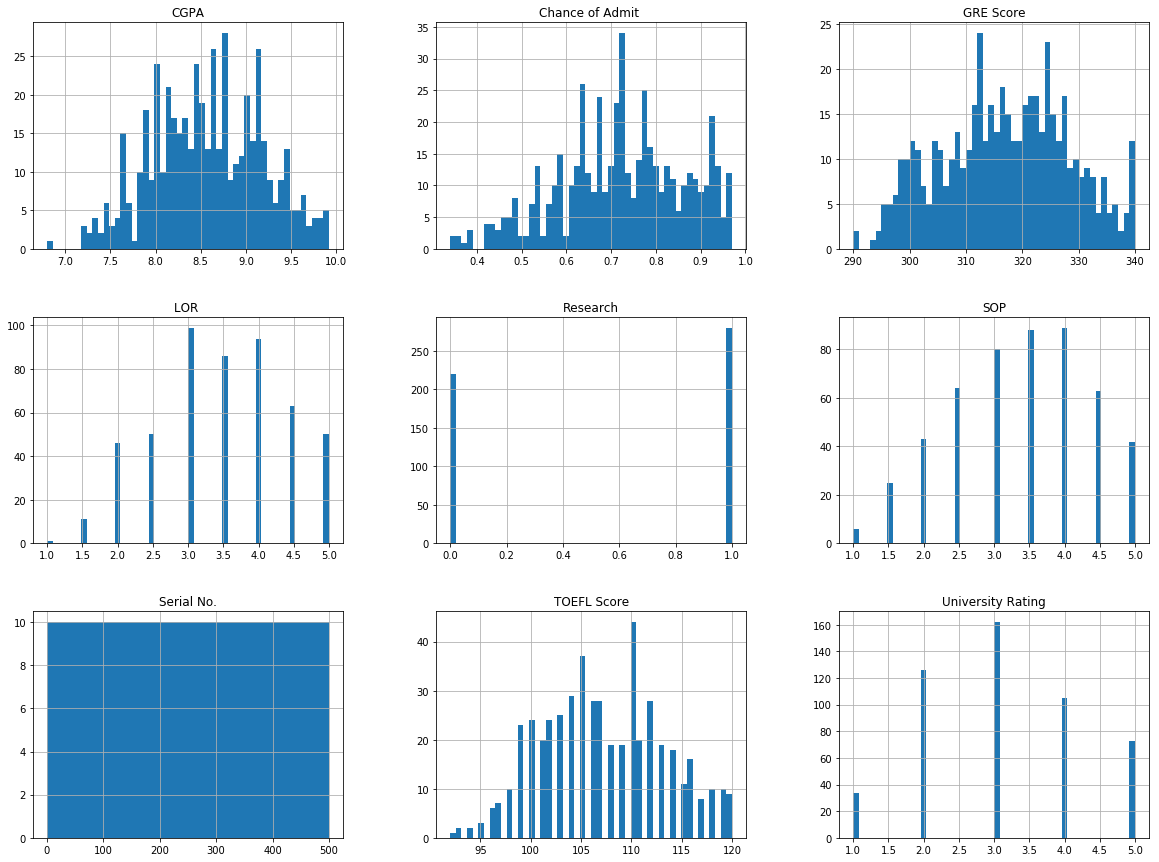

In [6]:
admission.hist(bins=50, figsize=(20,15))

Let's see the correlation among variables.

In [7]:
corr_matrix = admission.corr()

In [8]:
corr_matrix["Chance of Admit "].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Serial No.           0.008505
Name: Chance of Admit , dtype: float64

We can see the most important three features which are highly related to the target (Chance of Admit) are CGPA, GRE Score and TOEFL Score.  
Let's plot the correlations among these three variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0AE5CAF60>,
      dtype=object)

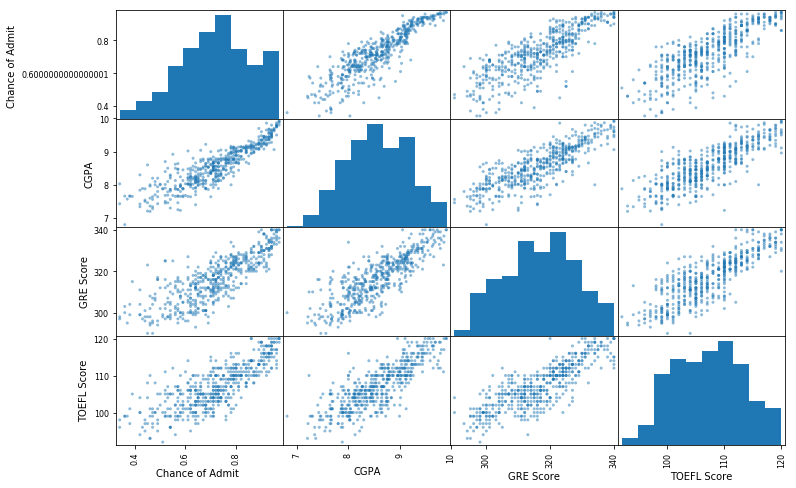

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["Chance of Admit ", "CGPA", "GRE Score", "TOEFL Score"]
scatter_matrix(admission[attributes], figsize=(12, 8))

In [10]:
np.random.seed(42)

In [11]:
#setting input variables and target variable
x = admission.drop(["Serial No.","Chance of Admit "], axis=1)
y = admission["Chance of Admit "].values

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Data Preprocessing

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = 

# Train a model : Regression Algorithms

#### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
from sklearn.metrics import mean_squared_error
lr_pred_train = lin_reg.predict(x_train)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_train_rmse = np.sqrt(lr_train_mse)

lr_pred_test = lin_reg.predict(x_test)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_test_rmse = np.sqrt(lr_test_mse)

print("linear regression RMSE(train):", lr_train_rmse)
print("linear regression RMSE(test):", lr_test_rmse) 

linear regression RMSE(train): 0.059384808482100516
linear regression RMSE(test): 0.06086588041578312


Train and test RMSE are nearly same, so we can think overfitting problem did not occur in this model.

#### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [17]:
tr_pred_train = tree_reg.predict(x_train)
tree_train_mse = mean_squared_error(y_train, tr_pred_train)
tree_train_rmse = np.sqrt(tree_train_mse)

tr_pred_test = tree_reg.predict(x_test)
tree_test_mse = mean_squared_error(y_test, tr_pred_test)
tree_test_rmse = np.sqrt(tree_test_mse)

print("Decision Tree regression RMSE(train):", tree_train_rmse)
print("Decision Tree regression RMSE(test):", tree_test_rmse)

Decision Tree regression RMSE(train): 1.6653345369377347e-17
Decision Tree regression RMSE(test): 0.09296235797353679


Train RMSE is nearly zero! This means there is a serious overfitting problem in this Decision Tree Regressor model.

#### Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train, y_train)

fr_pred_train = forest_reg.predict(x_train)
forest_train_mse = mean_squared_error(y_train, fr_pred_train)
forest_train_rmse = np.sqrt(forest_train_mse)

fr_pred_test = forest_reg.predict(x_test)
forest_test_mse = mean_squared_error(y_test, fr_pred_test)
forest_test_rmse = np.sqrt(forest_test_mse)

print("Random Forest RMSE(train):", forest_train_rmse)
print("Random Forest RMSE(test):", forest_test_rmse)

Random Forest RMSE(train): 0.025004675062875726
Random Forest RMSE(test): 0.06516902638523922


#### Comparison of Regression Algorithms

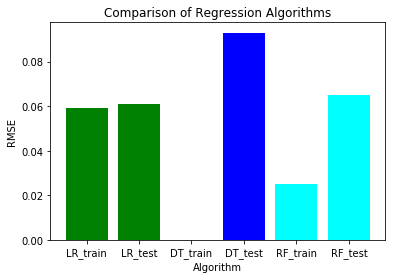

In [19]:
x = ["LR_train","LR_test","DT_train","DT_test","RF_train","RF_test"]
y = [lr_train_rmse,lr_test_rmse,tree_train_rmse,tree_test_rmse,forest_train_rmse,forest_test_rmse]

plt.bar(x,y,color=['green','green','blue','blue','cyan','cyan'])
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("RMSE")
plt.show()

Linear Regression algorithm showed the best performance because its test RMSE was the lowest and overfitting did not occur.  
On the contrary, Decision Tree and Random Forest algorithms showed the lower RMSE for train data than Linear Regression but there were significant overfit on both of them. 

# Train a model : Classification Algorithms

#### Define Labels

In [20]:
#My definition: If a data instance's 'chance of admit' is greater than 80% then the data instance is classfied as '1' else '0' 
y_train_c = [1 if each > 0.8 else 0 for each in y_train]
y_test_c  = [1 if each > 0.8 else 0 for each in y_test]

#### SVM (Support Vector Machine)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

svm = SVC(random_state = 42)
svm.fit(x_train,y_train_c)
print("[SVM] score: ", svm.score(x_test,y_test_c))
print("[SCM] f1 score: ",f1_score(y_test_c,svm.predict(x_test)))

[SVM] score:  0.97
[SCM] f1 score:  0.9433962264150944


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Gaussian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train_c)
print("[Gaussian Naive Bayes] score: ", gnb.score(x_test,y_test_c))
print("[Gaussian Naive Bayes] f1_score: ",f1_score(y_test_c,gnb.predict(x_test)))

[Gaussian Naive Bayes] score:  0.93
[Gaussian Naive Bayes] f1_score:  0.8852459016393442


#### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train_c)
print("[Decision Tree Classifier] score: ", dtc.score(x_test,y_test_c))
print("[Decision Tree Classifier] f1_score: ",f1_score(y_test_c,dtc.predict(x_test)))

[Decision Tree Classifier] score:  0.95
[Decision Tree Classifier] f1_score:  0.912280701754386


#### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 42)
rfc.fit(x_train,y_train_c)
print("[Random Forest Classifier] score: ", rfc.score(x_test,y_test_c))
print("[Random Forest Classifier] f1_score: ",f1_score(y_test_c,rfc.predict(x_test)))

[Random Forest Classifier] score:  0.96
[Random Forest Classifier] f1_score:  0.9259259259259259


#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train,y_train_c)
print("[Logistic Regression] score: ", lrc.score(x_test,y_test_c))
print("[Logistic Regression] f1_score: ",f1_score(y_test_c,lrc.predict(x_test)))

[Logistic Regression] score:  0.96
[Logistic Regression] f1_score:  0.923076923076923


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Comparison of Classification Algorithms

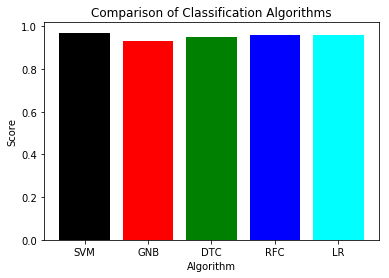

In [26]:
x = ["SVM","GNB","DTC","RFC","LR"]
y = [svm.score(x_test,y_test_c),gnb.score(x_test,y_test_c),dtc.score(x_test,y_test_c),rfc.score(x_test,y_test_c),lrc.score(x_test,y_test_c)]

plt.bar(x,y,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.show()

All scores were high (0.93 ~ 0.96), the hightest one was SVM.

# Refinement

To remedy overfitting due to small data set, I tried cross validation.

In [27]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lin_reg, x_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)

tree_scores = cross_val_score(tree_reg, x_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

forest_scores = cross_val_score(forest_reg, x_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Linear Regression Cross Validation Mean: ", lr_rmse_scores.mean())
print("Decision Tree Cross Validation Mean: ", tree_rmse_scores.mean())
print("Random Forest Cross Validation Mean: ", forest_rmse_scores.mean())

Linear Regression Cross Validation Mean:  0.059890949662881256
Decision Tree Cross Validation Mean:  0.08550529174840318
Random Forest Cross Validation Mean:  0.06475450882065156


#### Comparison of Regression Algorithms after Refinement(Cross Validation)

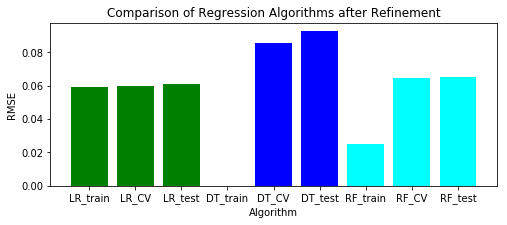

In [28]:
x = ["LR_train","LR_CV","LR_test","DT_train","DT_CV","DT_test","RF_train","RF_CV","RF_test"]
y = [lr_train_rmse,lr_rmse_scores.mean(),lr_test_rmse,tree_train_rmse,tree_rmse_scores.mean(),tree_test_rmse,forest_train_rmse,forest_rmse_scores.mean(),forest_test_rmse]

plt.figure(figsize=(8, 3))
plt.bar(x,y,color=['green','green','green','blue','blue','blue','cyan','cyan','cyan'])
plt.title("Comparison of Regression Algorithms after Refinement")
plt.xlabel("Algorithm")
plt.ylabel("RMSE")
plt.show()

After applying cross validation, we can see there were outstanding improvements on both Decision Tree and Random Forest algorithms: Overfitting were significantly diminished on both of them.  
Still, Linear Regression algorithm showed the best performance among them, which is my final model after benchmarking.

# Model Evaluation

To test my final model, I tried some input data and compared the predicted outputs with labels.

In [49]:
for i in np.arange(0,100,10):
    print("Index:%d  Prediction:%.2f  Real:%.2f"
          %(i,lin_reg.predict(x_test.iloc[[i],:])[0],y_test[i]))

Index:0  Prediction:0.91  Real:0.93
Index:10  Prediction:0.72  Real:0.45
Index:20  Prediction:0.67  Real:0.67
Index:30  Prediction:0.56  Real:0.59
Index:40  Prediction:0.97  Real:0.96
Index:50  Prediction:0.89  Real:0.93
Index:60  Prediction:0.63  Real:0.68
Index:70  Prediction:0.62  Real:0.64
Index:80  Prediction:0.77  Real:0.80
Index:90  Prediction:0.74  Real:0.73


# Justification

To compare my final model with benchmarks, I repeated the above process: I entered the same input data into the benchmark models and compared the results.

In [48]:
for i in np.arange(0,100,10):
    print("Index:%d  LR_Pred:%.2f  DT_Pred:%.2f  RF_Pred:%.2f  Real:%.2f"
          %(i,lin_reg.predict(x_test.iloc[[i],:])[0],
            tree_reg.predict(x_test.iloc[[i],:])[0],
            forest_reg.predict(x_test.iloc[[i],:])[0],
            y_test[i]))

Index:0  LR_Pred:0.91  DT_Pred:0.93  RF_Pred:0.94  Real:0.93
Index:10  LR_Pred:0.72  DT_Pred:0.67  RF_Pred:0.69  Real:0.45
Index:20  LR_Pred:0.67  DT_Pred:0.72  RF_Pred:0.64  Real:0.67
Index:30  LR_Pred:0.56  DT_Pred:0.56  RF_Pred:0.56  Real:0.59
Index:40  LR_Pred:0.97  DT_Pred:0.96  RF_Pred:0.96  Real:0.96
Index:50  LR_Pred:0.89  DT_Pred:0.87  RF_Pred:0.90  Real:0.93
Index:60  LR_Pred:0.63  DT_Pred:0.61  RF_Pred:0.61  Real:0.68
Index:70  LR_Pred:0.62  DT_Pred:0.64  RF_Pred:0.61  Real:0.64
Index:80  LR_Pred:0.77  DT_Pred:0.55  RF_Pred:0.66  Real:0.80
Index:90  LR_Pred:0.74  DT_Pred:0.78  RF_Pred:0.76  Real:0.73


Next, for some selected indices let's plot the predicted values of LR, DT, RF algorithms and real value: 

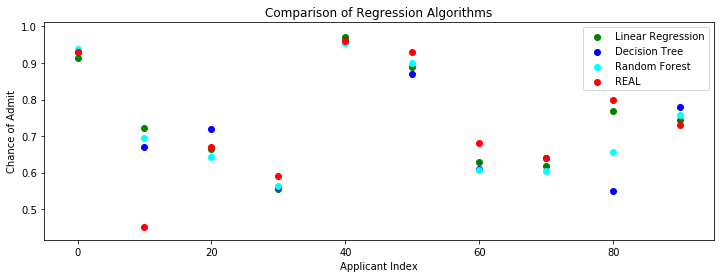

In [47]:
plt.figure(figsize=(12, 4))
green = plt.scatter(np.arange(0,100,10),lr_pred_test[0:100:10],color = "green")
blue = plt.scatter(np.arange(0,100,10),tr_pred_test[0:100:10],color = "blue")
cyan = plt.scatter(np.arange(0,100,10),fr_pred_test[0:100:10],color = "cyan")
red = plt.scatter(np.arange(0,100,10),y_test[0:100:10],color = "red")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Applicant Index")
plt.ylabel("Chance of Admit")
plt.legend((green,blue,cyan,red),('Linear Regression', 'Decision Tree', 'Random Forest', 'REAL'), loc=1)
plt.show()

# Additional Visualization

To see the correlation among variables heatmap is also a good choice.

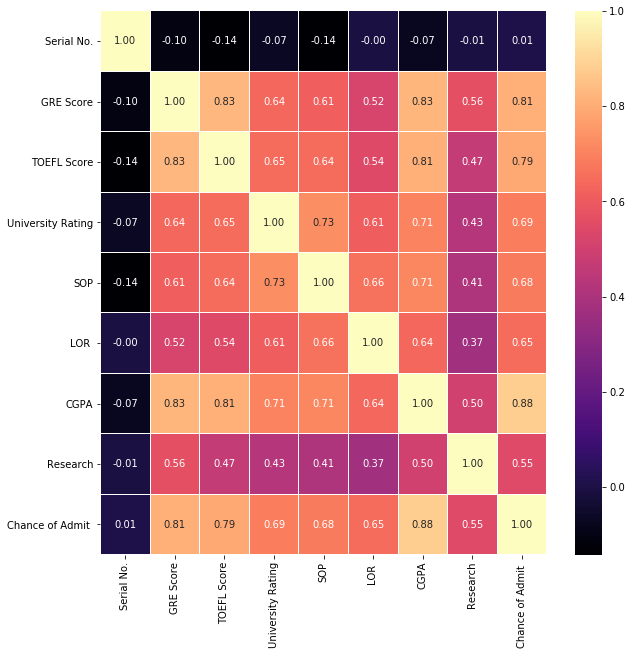

In [32]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(admission.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()